# Advanced Calculus with SageMath - Chapter 5

## Green's Theorem and Applications

This notebook contains Chapter 5 from the main Advanced Calculus with SageMath notebook.

For the complete course, please refer to the main notebook: `Advanced Calculus with SageMath.ipynb`


In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 5: Green's Theorem and Applications

### Green's Theorem Statement

For a positively oriented, simple closed curve C and the region D it encloses:

$$\oint_C (P\,dx + Q\,dy) = \iint_D \left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y}\right) dA$$

This connects line integrals around closed curves to double integrals over regions.

In [20]:
from IPython.display import display, Math
var('x y t R r theta')

print("GREEN'S THEOREM")
print("=" * 50)

# Vector field F = (P, Q) = (x^2 y, x y^2)
P = x^2 * y
Q = x * y^2
display(Math(r"\vec{F}=(P,Q)=(" + latex(P) + r"," + latex(Q) + r")"))

# Curl = ∂Q/∂x − ∂P/∂y
dQ_dx = diff(Q, x)
dP_dy = diff(P, y)
curl_2D = dQ_dx - dP_dy
display(Math(r"\frac{\partial Q}{\partial x}=" + latex(dQ_dx)))
display(Math(r"\frac{\partial P}{\partial y}=" + latex(dP_dy)))
display(Math(r"\mathrm{curl}=\frac{\partial Q}{\partial x}-\frac{\partial P}{\partial y}="
             + latex(curl_2D)))

# Region: circle of radius R
display(Math(r"D=\{(x,y): x^2+y^2\le R^2\}"))

# Method 1: Line integral
print("\nMETHOD 1: Line Integral")
x_circle = R*cos(t)
y_circle = R*sin(t)
dx_dt = diff(x_circle, t)
dy_dt = diff(y_circle, t)

P_on_circle = P.subs({x: x_circle, y: y_circle})
Q_on_circle = Q.subs({x: x_circle, y: y_circle})
integrand_line = P_on_circle*dx_dt + Q_on_circle*dy_dt
integrand_line_simplified = simplify(integrand_line)
display(Math(r"\text{Integrand}:\;"+ latex(integrand_line_simplified)))

line_integral_result = integrate(integrand_line_simplified, (t, 0, 2*pi))
display(Math(r"\text{Line integral}=\int_{0}^{2\pi} "
             + latex(integrand_line_simplified) + r"\,dt = "
             + latex(line_integral_result)))

# Method 2: Double integral (Green's Theorem)
print("\nMETHOD 2: Double Integral (Green's Theorem)")
display(Math(r"\iint_D \mathrm{curl}\, dA = " + latex(curl_2D)))

curl_polar = curl_2D.subs({x: r*cos(theta), y: r*sin(theta)})
curl_polar_simplified = simplify(curl_polar)
display(Math(r"\text{In polar: } " + latex(curl_polar_simplified)))

inner_integral = integrate(curl_polar_simplified * r, (r, 0, R))
double_integral_result = integrate(inner_integral, (theta, 0, 2*pi))
display(Math(r"\text{Double integral}=" + latex(double_integral_result)))

print("\nVERIFICATION")
display(Math(r"\text{Line integral}=" + latex(line_integral_result)
             + r",\quad \text{Double integral}=" + latex(double_integral_result)))
print("Green's theorem verified! ")

GREEN'S THEOREM


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


METHOD 1: Line Integral


<IPython.core.display.Math object>

<IPython.core.display.Math object>


METHOD 2: Double Integral (Green's Theorem)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


VERIFICATION


<IPython.core.display.Math object>

Green's theorem verified! ✓


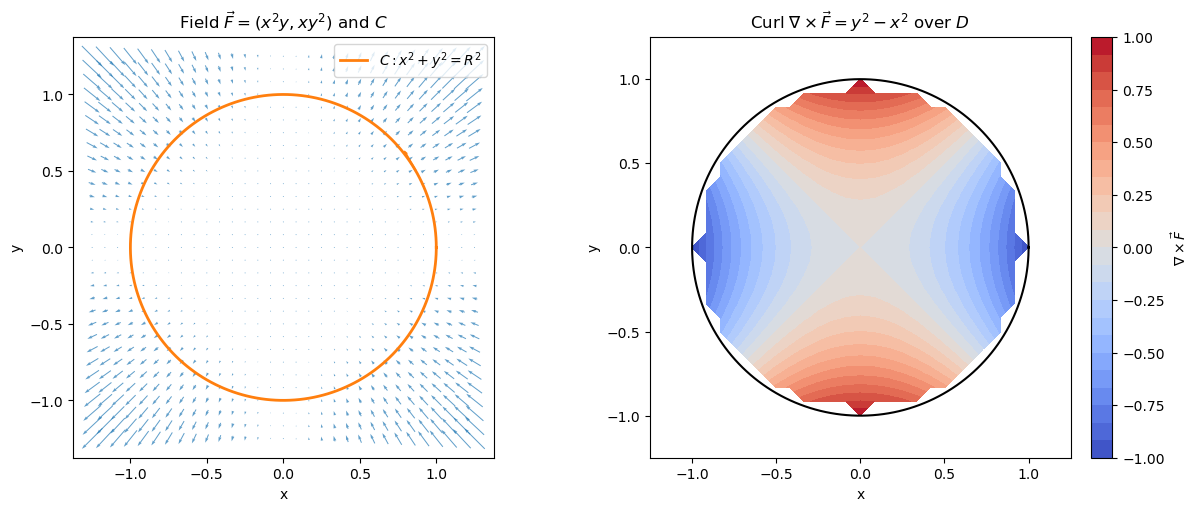

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R_val = 1.0
n = 31
x = np.linspace(-1.25*R_val, 1.25*R_val, n)
y = np.linspace(-1.25*R_val, 1.25*R_val, n)
X, Y = np.meshgrid(x, y)

# Vector field F = (x^2 y, x y^2)
U = X**2 * Y
V = X * Y**2

# Curl (2D scalar): ∂Q/∂x − ∂P/∂y = y^2 − x^2
CURL = Y**2 - X**2

# Circle C and region D
tt = np.linspace(0, 2*np.pi, 400)
XC = R_val*np.cos(tt)
YC = R_val*np.sin(tt)
mask_outside = (X**2 + Y**2) > R_val**2
CURL_masked = np.ma.masked_where(mask_outside, CURL)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Left: vector field + boundary C with orientation
axs[0].quiver(X, Y, U, V, color='tab:blue', alpha=0.7, pivot='mid', scale=40)
axs[0].plot(XC, YC, color='tab:orange', lw=2, label='$C: x^2+y^2=R^2$')
# Orientation arrow on C (counterclockwise)
t0 = np.pi/6
x0, y0 = R_val*np.cos(t0), R_val*np.sin(t0)
tx, ty = -R_val*np.sin(t0), R_val*np.cos(t0)
axs[0].arrow(x0, y0, 0.15*tx, 0.15*ty, width=0.005, color='tab:orange', length_includes_head=True)
axs[0].set_aspect('equal', 'box')
axs[0].set_title(r'Field $\vec F=(x^2y, xy^2)$ and $C$')
axs[0].set_xlabel('x'); axs[0].set_ylabel('y')
axs[0].legend(loc='upper right')

# Right: curl over D
levels = np.linspace(-R_val**2, R_val**2, 25)
cf = axs[1].contourf(X, Y, CURL_masked, levels=levels, cmap='coolwarm')
axs[1].plot(XC, YC, color='k', lw=1.5)
axs[1].set_aspect('equal', 'box')
axs[1].set_title(r'Curl $\nabla\times\vec F = y^2 - x^2$ over $D$')
axs[1].set_xlabel('x'); axs[1].set_ylabel('y')
cbar = fig.colorbar(cf, ax=axs[1], fraction=0.046, pad=0.04)
cbar.set_label(r'$\nabla\times\vec F$')

plt.show()

---

## **Continuing Your Learning Journey**

You've completed **Green's Theorem and Applications**! The concepts you've mastered here form essential building blocks for what comes next.

**Ready for Surface Integrals and Flux?**

In Chapter 6, we'll build upon these foundations to explore even more fascinating aspects of the subject. The knowledge you've gained here will directly apply to the advanced concepts ahead.

### **What's Next**

Chapter 6 will expand your understanding by introducing new techniques and applications that leverage everything you've learned so far.

**[Continue to Chapter 6: Surface Integrals and Flux →](https://cocalc.com/share/public_paths/9eba1d4f9897f501e0ae7f583882018c18b484d3)**

*or*

**[Return to Complete Course](https://cocalc.com/share/public_paths/ab3ad2f15d8989653377cbfdc238a82399b2633f)**